## Problem Statement: Predict the Life_Expectancy depending upon various factors of specific countries

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import optuna
from sklearn.ensemble import VotingRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv(r"C:\Users\acer\Desktop\Data Science Innomatics\ML\Projects\End-To-End\Life_Expectancy\Life Expectancy Data.csv")
datac = data.copy()
datac

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Data Quality

In [3]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [3]:
## Removed whitespaces

datac.columns = datac.columns.str.strip()

In [4]:
datac.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
datac.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


<Axes: >

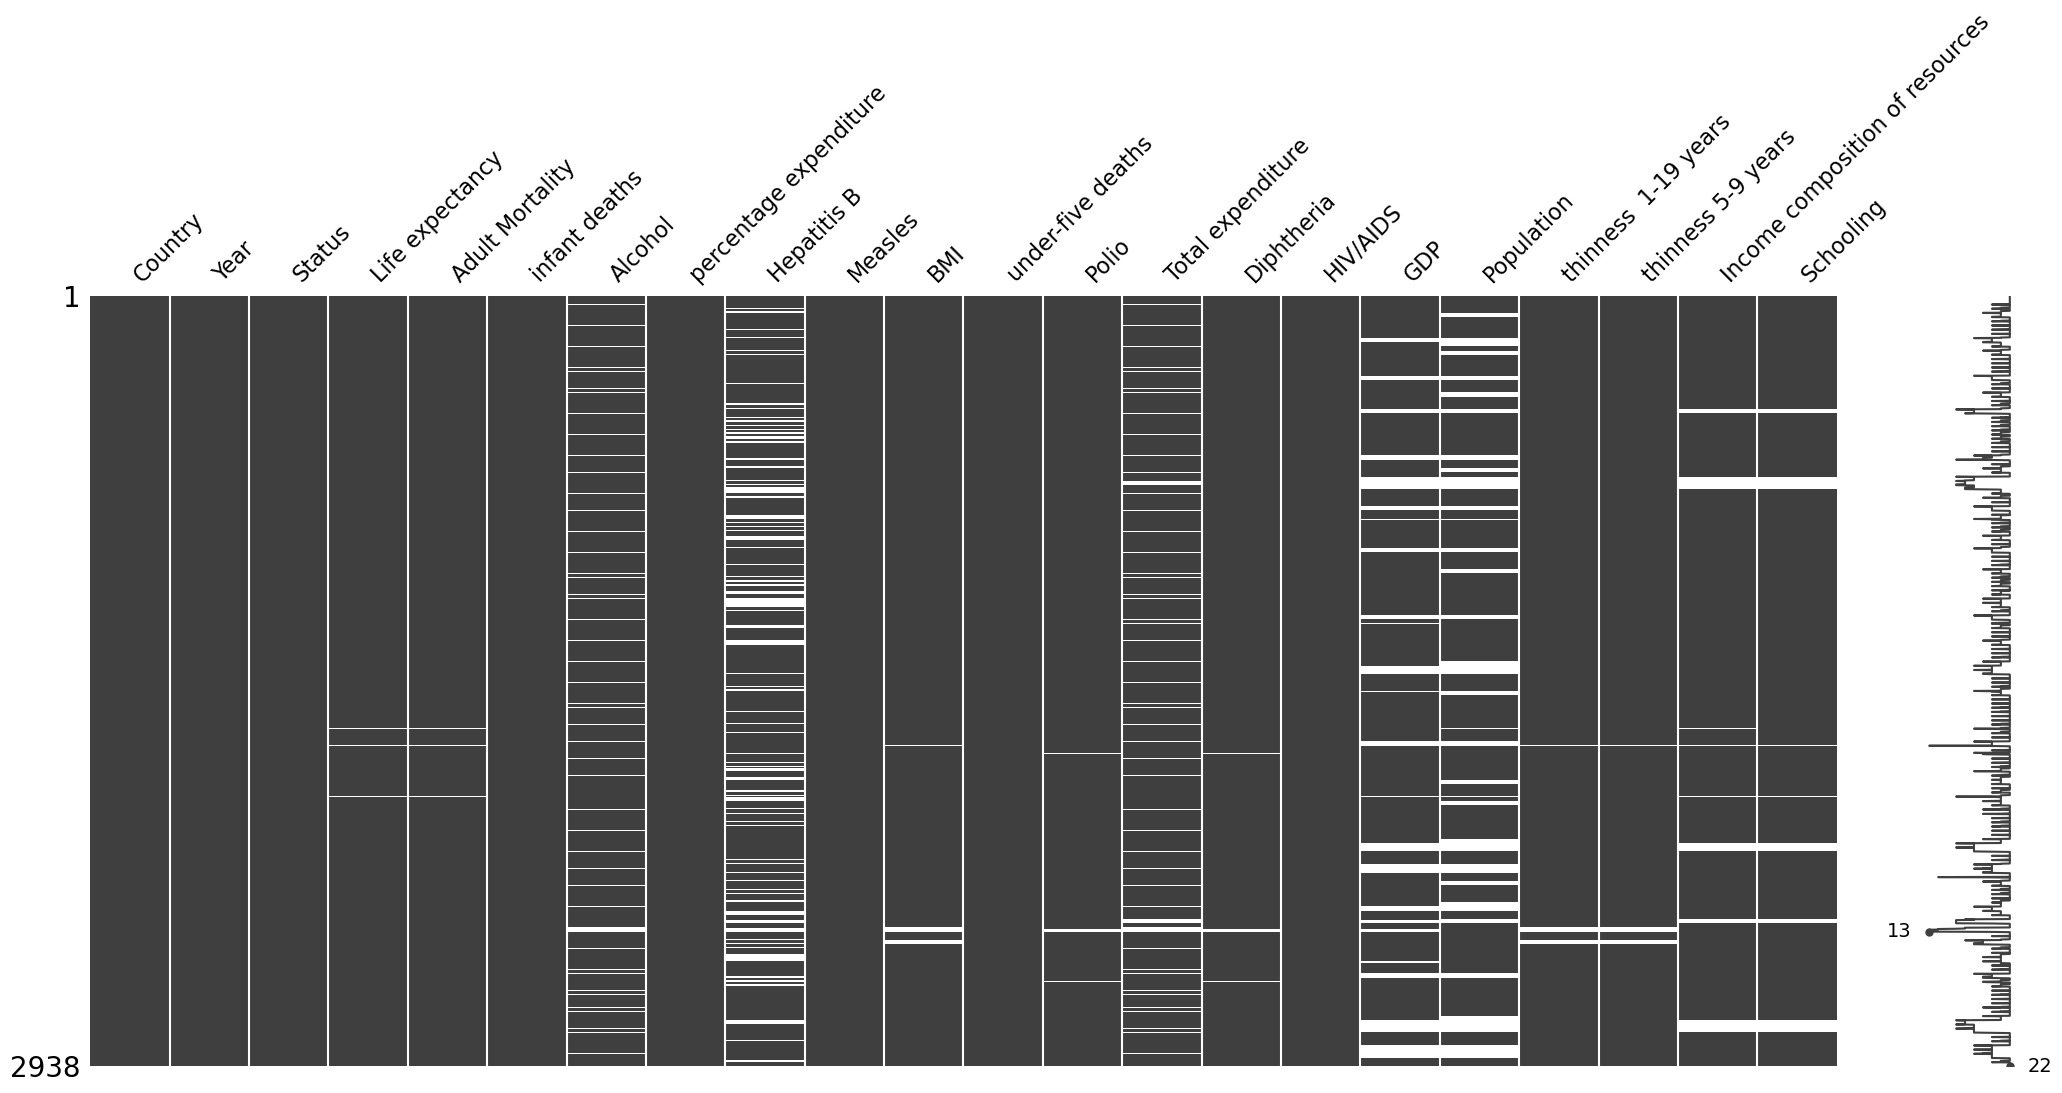

In [6]:
import missingno as msno 
   
msno.matrix(datac) 

## Simple EDA

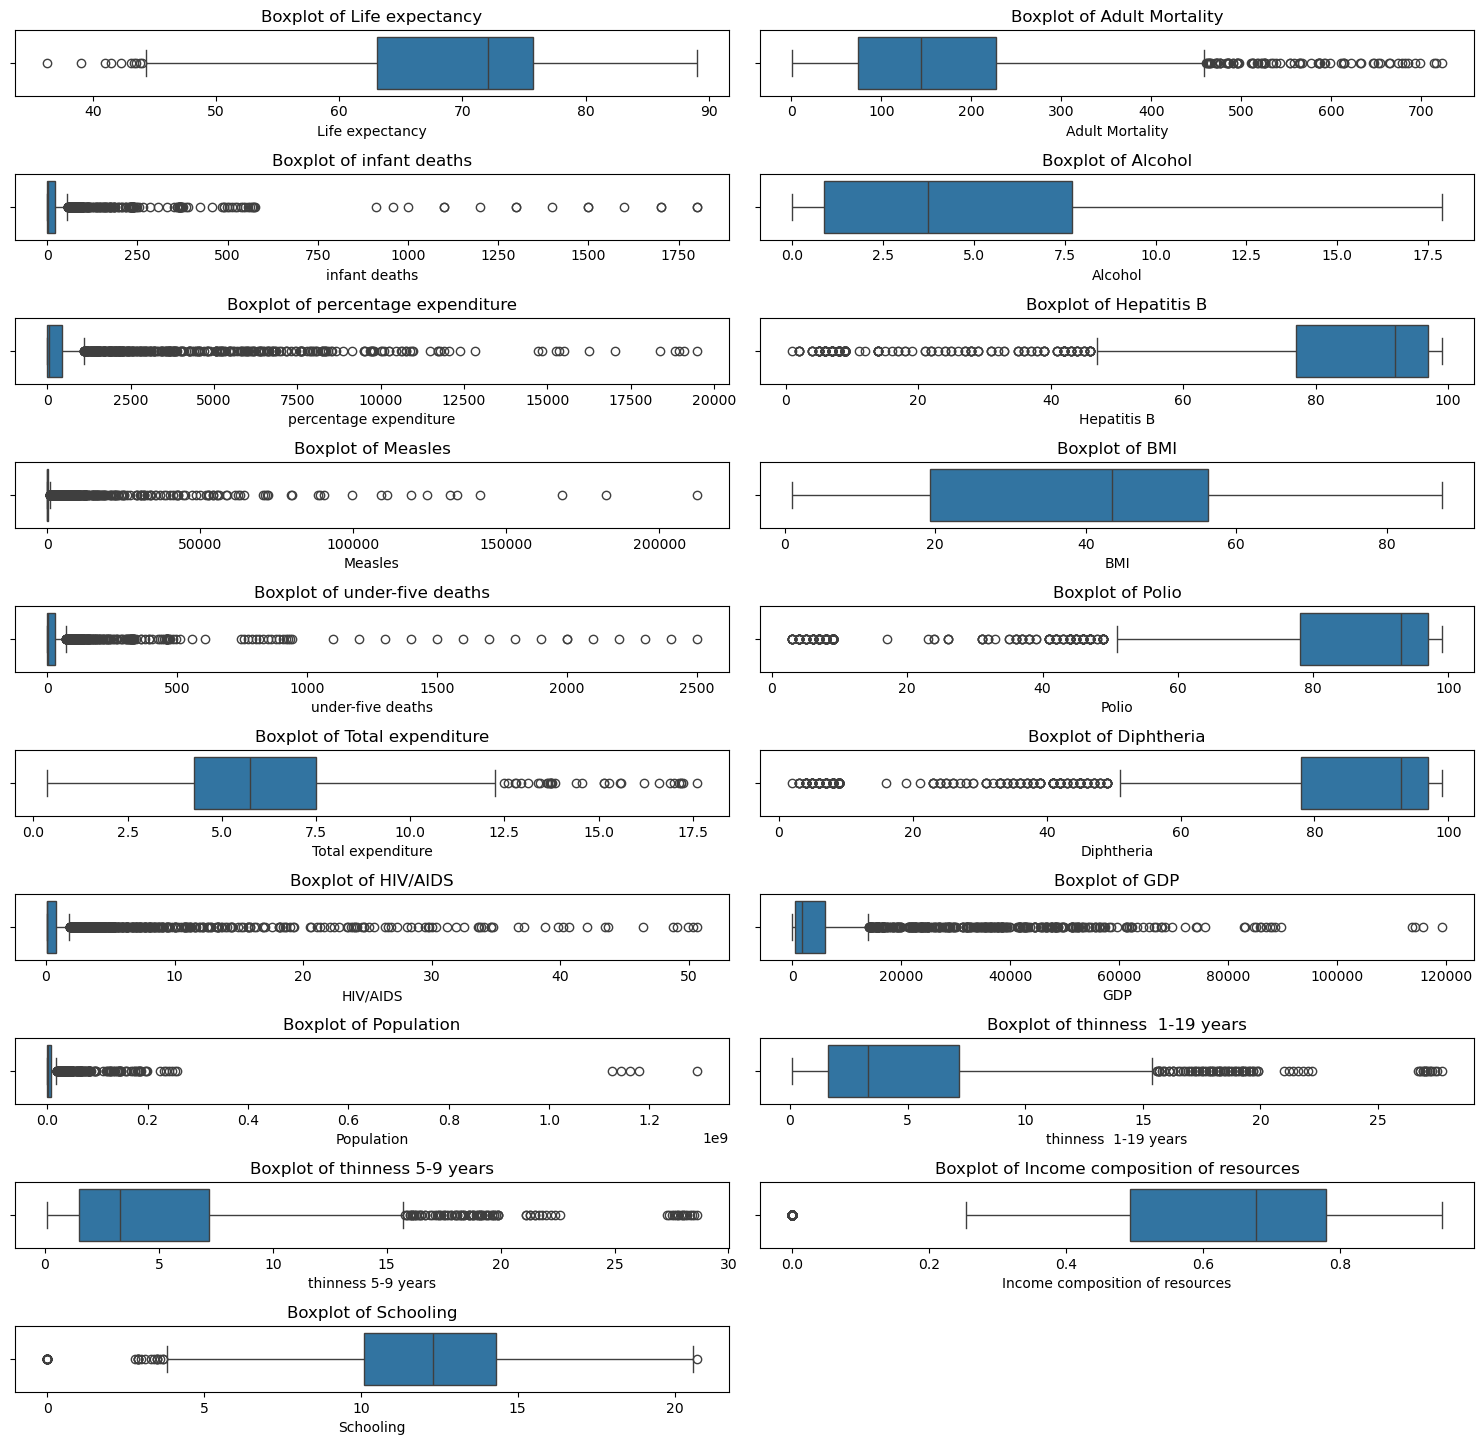

In [54]:
plt.figure(figsize=(15, 17))

columns = ['Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling']

for i, col in enumerate(columns, 1):
    plt.subplot(12, 2, i)
    sns.boxplot(x=datac[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

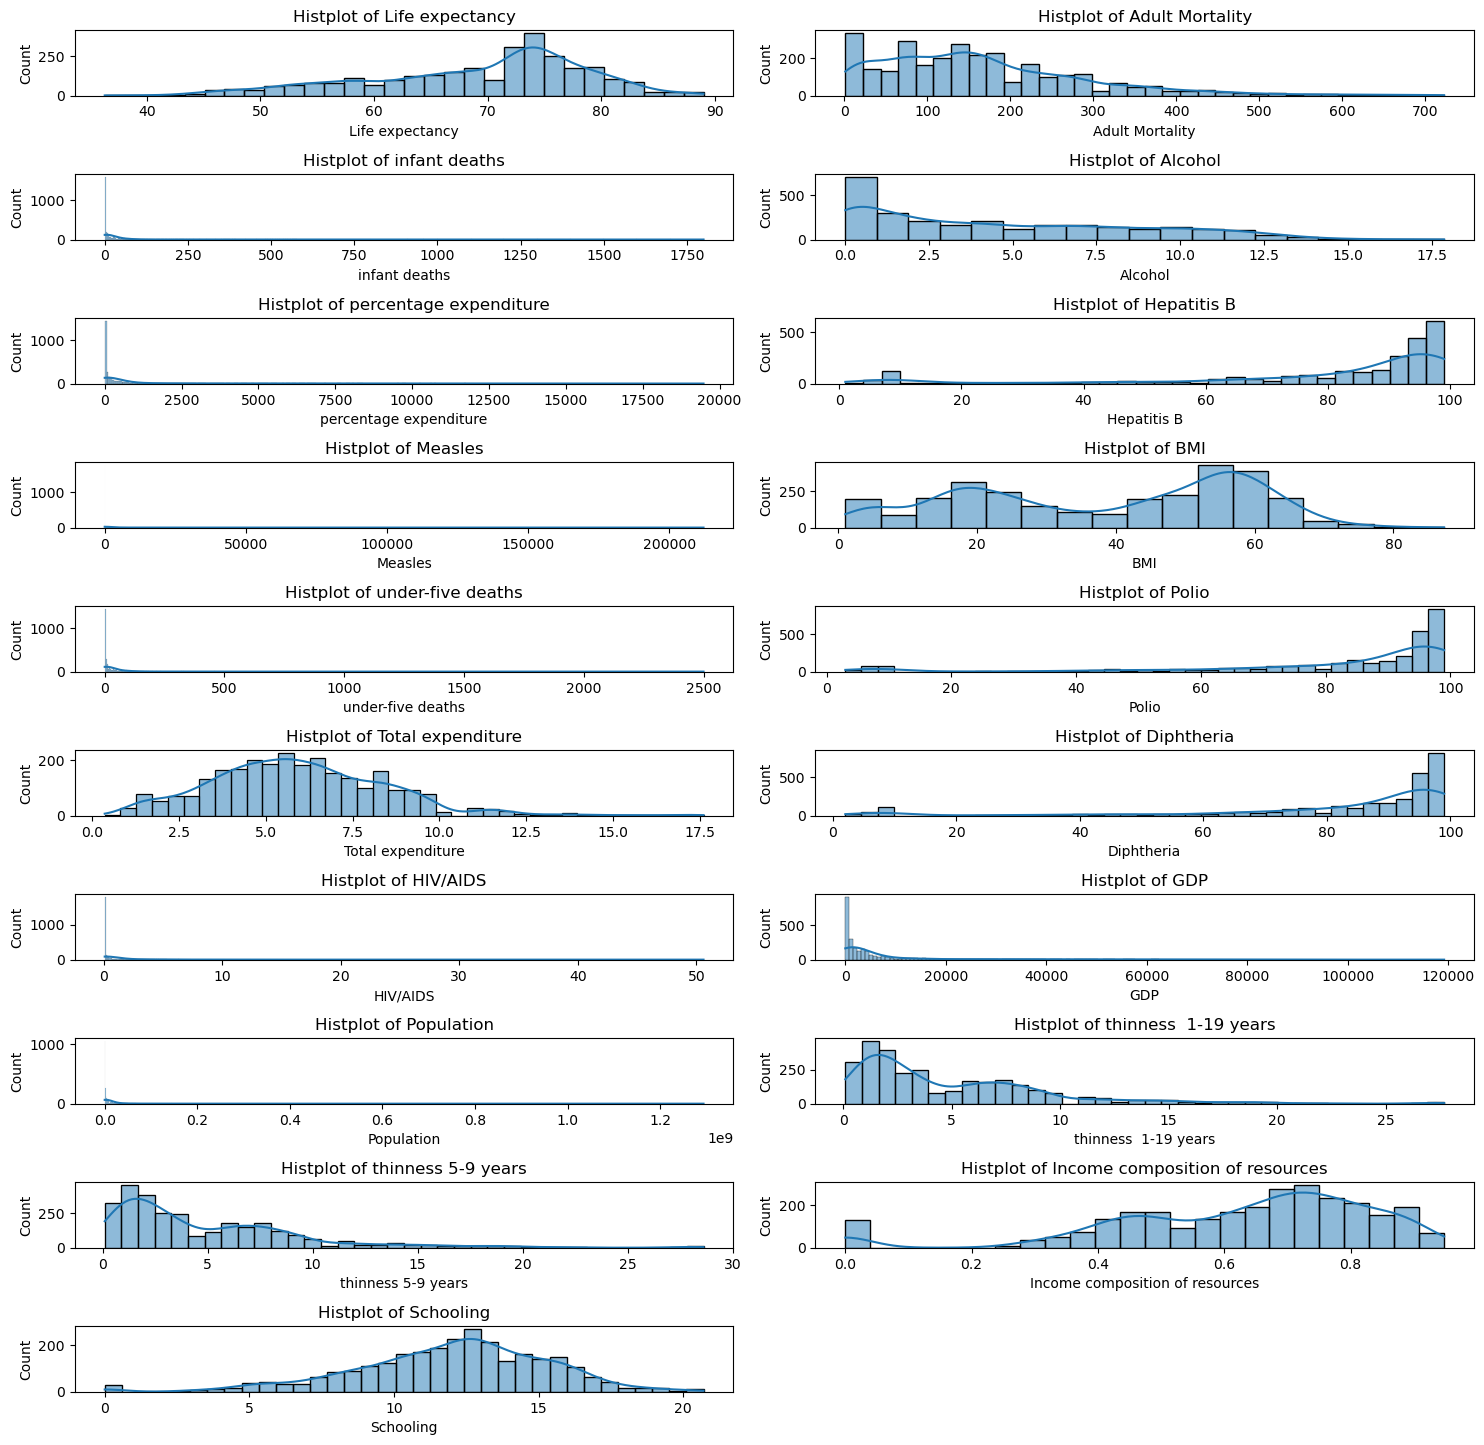

In [16]:
plt.figure(figsize=(15, 17))

columns = ['Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling']

for i, col in enumerate(columns, 1):
    plt.subplot(12, 2, i)
    sns.histplot(x=datac[col], kde=True)
    plt.title(f'Histplot of {col}')

plt.tight_layout()
plt.show()

## Treating Null Values

In [4]:
datac.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

+ **Using "Median" Imputation to fill highly skewed data**

In [4]:
datac['GDP'].fillna(datac['GDP'].median(), inplace=True)
datac['Population'].fillna(datac['Population'].median(), inplace=True)
datac['Hepatitis B'].fillna(datac['Hepatitis B'].median(), inplace=True)
datac['Total expenditure'].fillna(datac['Total expenditure'].median(), inplace=True)
datac['Adult Mortality'].fillna(datac['Adult Mortality'].median(), inplace=True)
datac['Alcohol'].fillna(datac['Alcohol'].median(), inplace=True)
datac['thinness  1-19 years'].fillna(datac['Alcohol'].median(), inplace=True)
datac['thinness 5-9 years'].fillna(datac['Alcohol'].median(), inplace=True)

+ **Mean Imputation for columns having small missing values and columns which are normally distributed**

In [5]:
datac['Diphtheria'].fillna(datac['Diphtheria'].mean(), inplace=True)
datac['Polio'].fillna(datac['Polio'].mean(), inplace=True)
datac['BMI'].fillna(datac['BMI'].mean(), inplace=True)
datac['Income composition of resources'].fillna(datac['Income composition of resources'].mean(), inplace=True)
datac['Schooling'].fillna(datac['Schooling'].mean(), inplace=True)
datac['Life expectancy'].fillna(datac['Life expectancy'].mean(), inplace=True)

+ **Using One-Hot Encoder on "Status" Column**

In [6]:
oe = OneHotEncoder(drop="first",sparse_output=False)
datac["Status"] = oe.fit_transform(datac[["Status"]])

In [8]:
datac.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [47]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   float64
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## Target Column Distribution

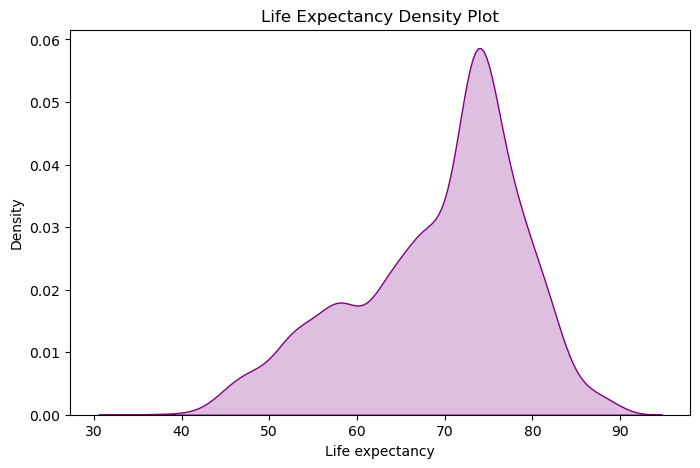

In [7]:
plt.figure(figsize=(8, 5))
sns.kdeplot(datac['Life expectancy'], fill=True, color="purple")
plt.title('Life Expectancy Density Plot')
plt.show()

## Insight:

+ Mostly Life Expectancy is in **range of 50-80**

---

In [8]:
data2 = datac.select_dtypes(exclude="object")

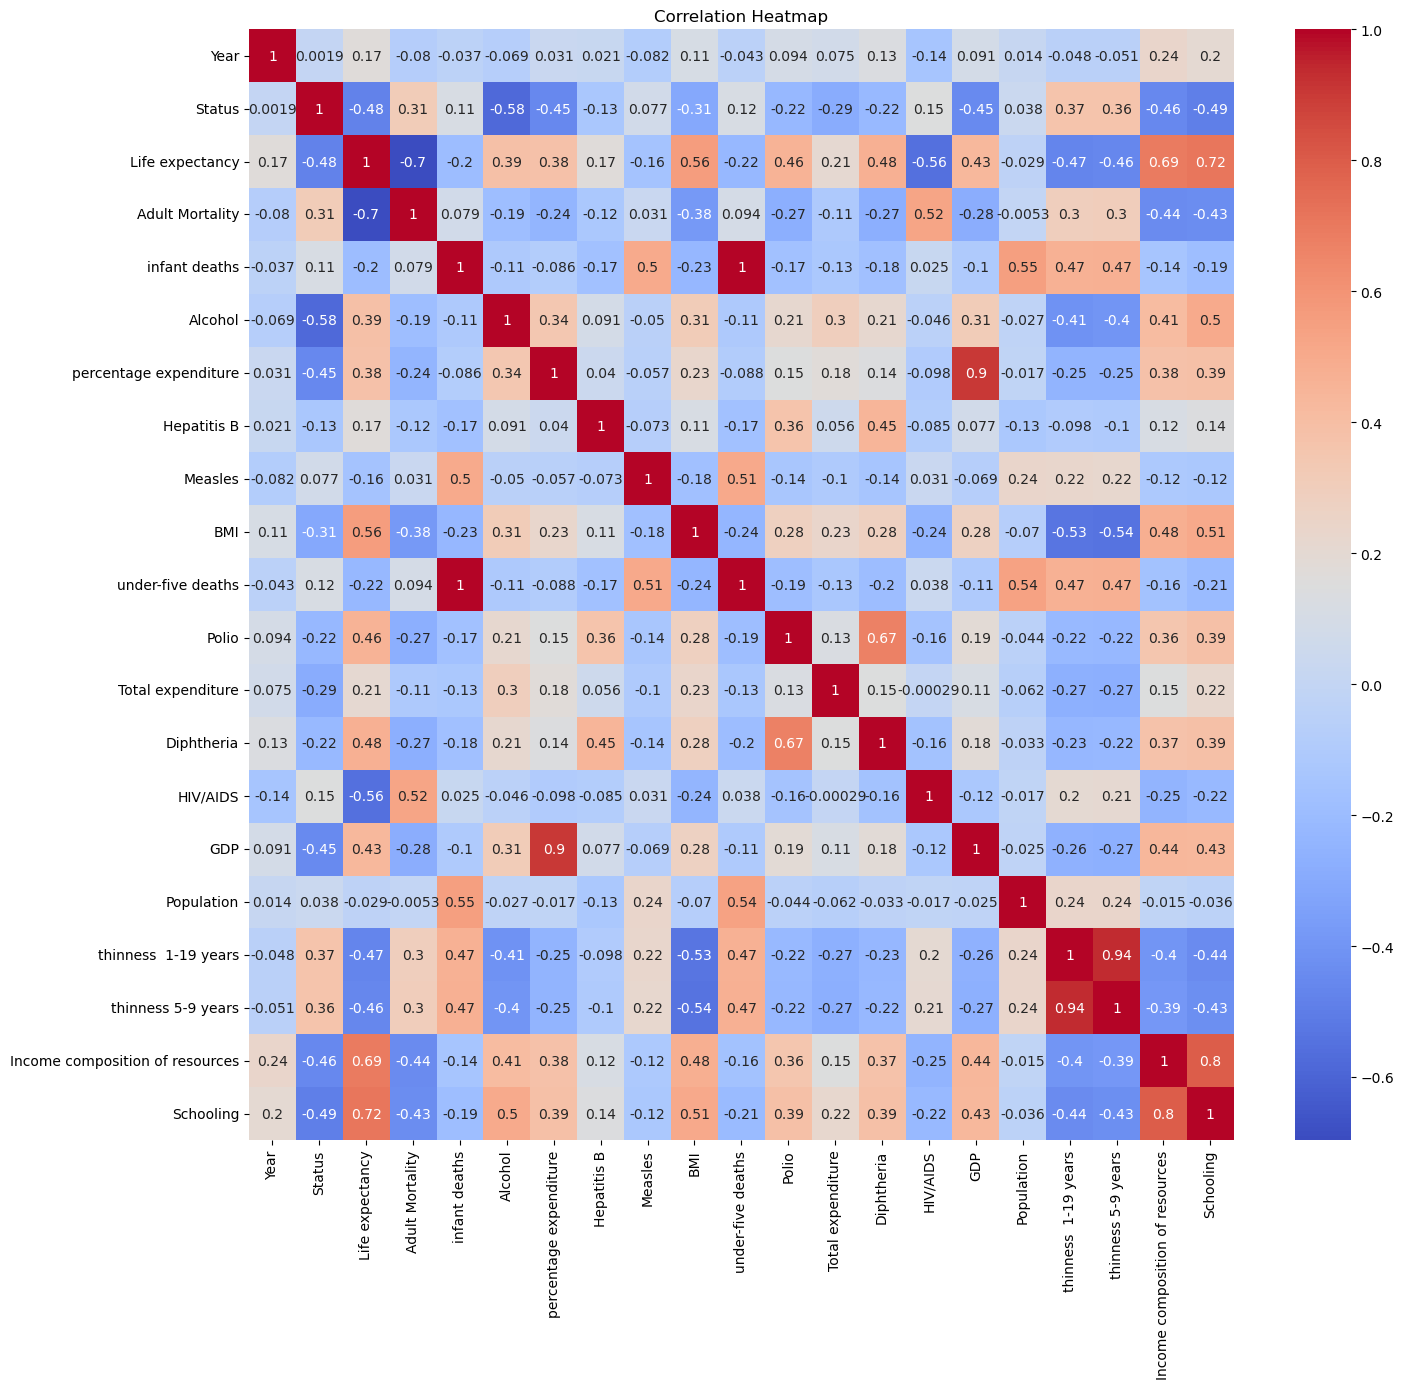

In [9]:
plt.figure(figsize=(15,14))

correlation = data2.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

## Insight: 
+ Our target column "Life_Expectancy" is mostly linearly dependent on **schooling, Income composition of resources, GDP, Diphtheria, Polio, BMI, percentage expendicture**

---

## How specific columns affecting Life Expectancy

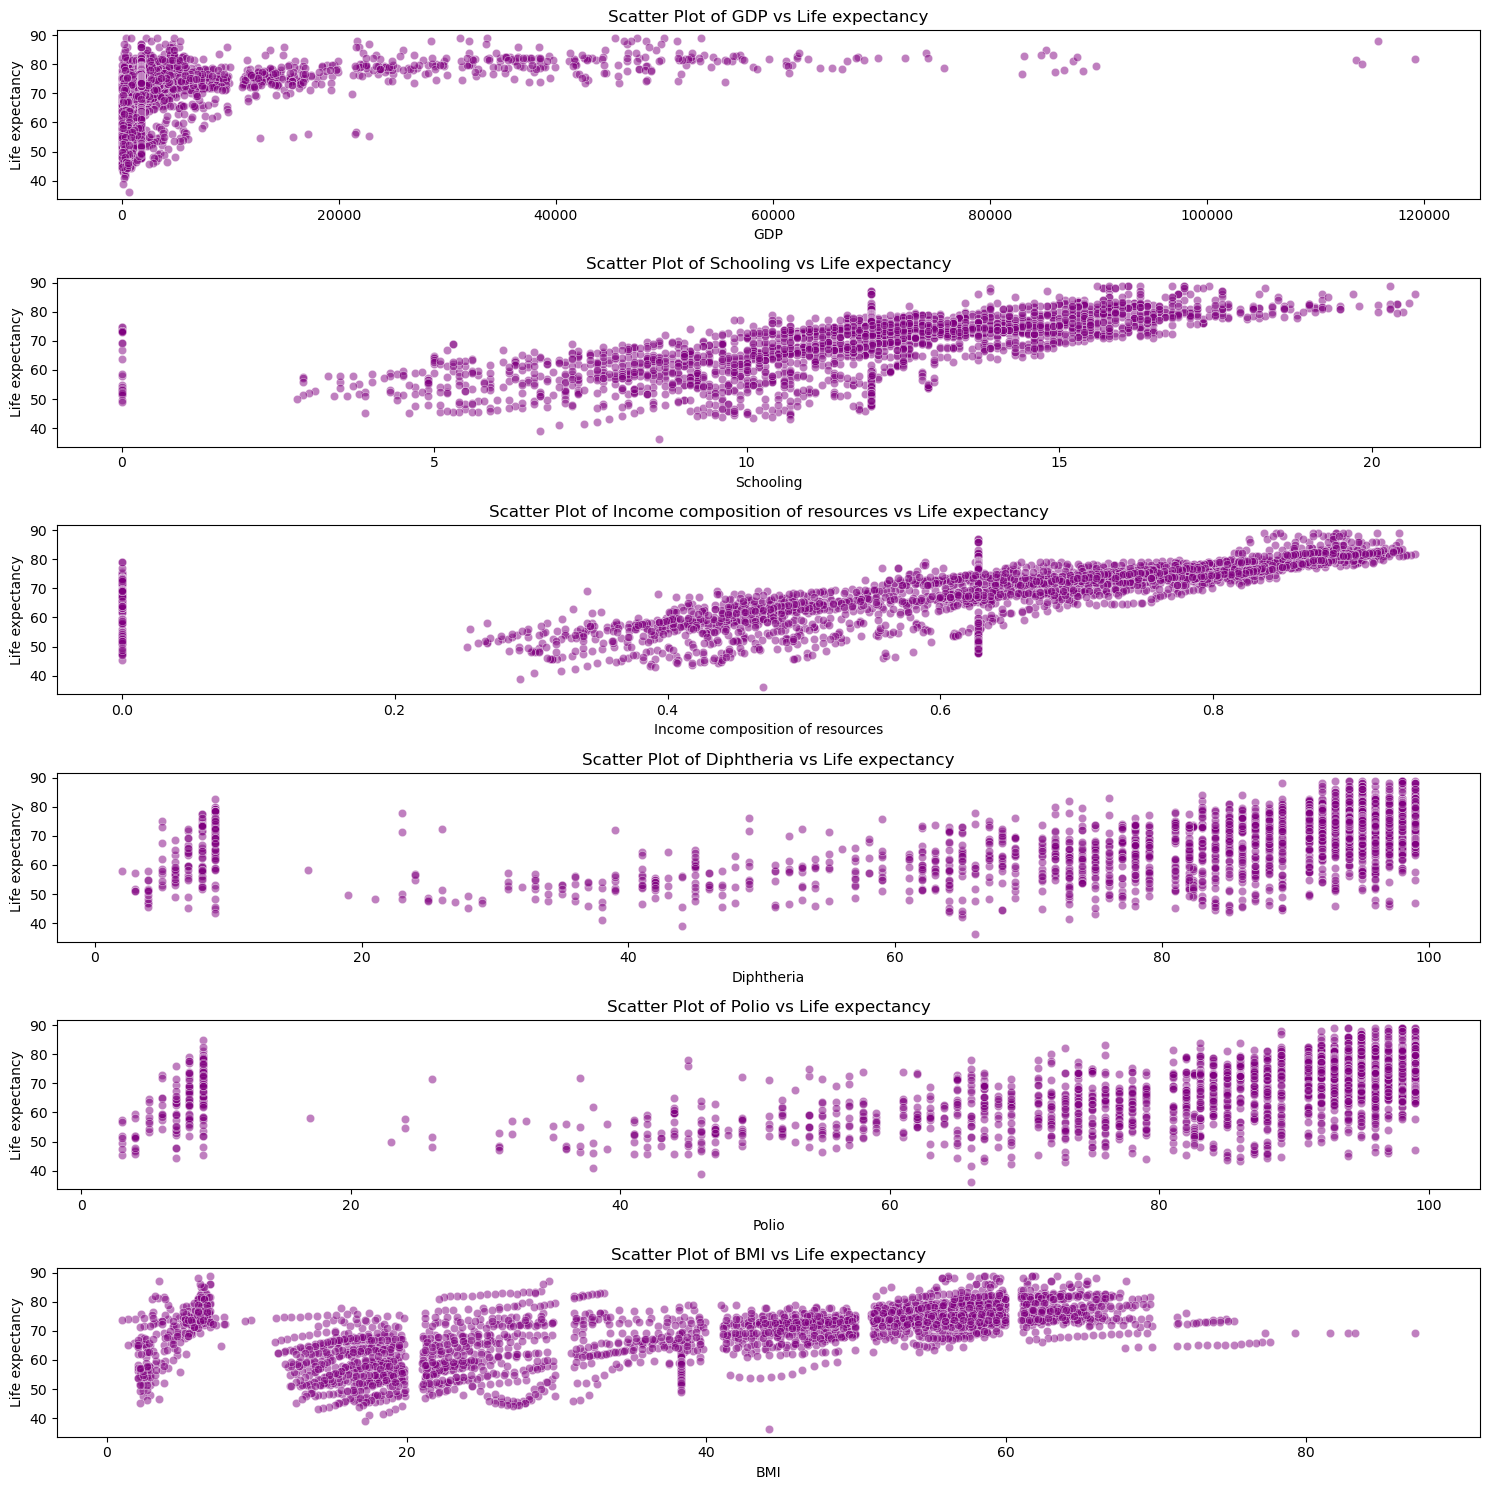

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting features to compare with Life Expectancy
features = ['GDP', 'Schooling', 'Income composition of resources', 'Diphtheria', 'Polio','BMI']
target = 'Life expectancy'

plt.figure(figsize=(15, 15))

for i, col in enumerate(features):
    plt.subplot(6, 1, i + 1)
    sns.scatterplot(x=datac[col], y=datac[target], alpha=0.5, color='purple')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f'Scatter Plot of {col} vs {target}')

plt.tight_layout()
plt.show()


## Insight:

+ 1️⃣ **GDP vs. Life Expectancy**
+ Trend: **Positive correlation** (as GDP increases, Life Expectancy also increases).
+ We can see as GDP Increase Life Expectancy is also increased, but if we see , Some countries with low GDP still have relatively high life expectancy, indicating good healthcare policies.
---
+ 2️⃣ **Schooling vs. Life Expectancy**
+ Trend: **Strong positive correlation** (more years of schooling → longer life).
+ More educated populations are aware of better hygiene, diet, and medical care, leading to longer life spans
---
+ 3️⃣ **Income Composition of Resources vs. Life Expectancy**
+ Trend: **Strong positive correlation** (higher income composition → longer life).
+ Income composition of resources is a measure of economic development and human capital.
+ Countries with higher economic stability tend to have better healthcare systems, social support, and lifestyle, improving life expectancy
---
+ 4️⃣ **Diphtheria vs. Life Expectancy** ( Same for **Polio vs. Life Expectancy** )
+ Trend: **Positive correlation** (higher vaccination → higher life expectancy).
+ Countries with higher Diphtheria vaccination rates (80%-100%) tend to have higher life expectancy (above 70 years).
+ Countries with low vaccination rates (<40%) show lower life expectancy (~40-60 years), likely due to poor healthcare infrastructure and higher disease prevalence.
---
+ 5️⃣ **BMI vs. Life Expectancy**
+ Trend: **No clear linear trend** (high variance in points).
+ Actucally when **BMI > 18, it is malnutrition**, reducing life expectancy and **BMI > 30, it is obesity**, impacting life expectancy
+ But if we our analysis, Countries having malnutrition and obesity problems, having more life expectancy. It can be because of **Advanced Healthcare, Better Nutrition, Medical Interventions**

---

## Life Expectancy vs Developed / Undeveloped Countries

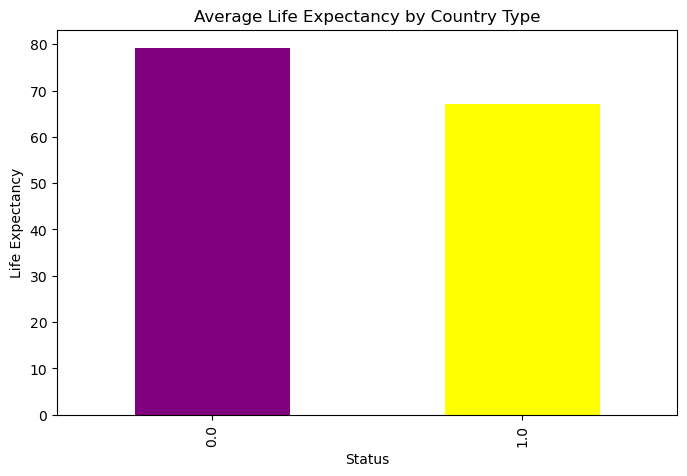

In [11]:
plt.figure(figsize=(8, 5))
datac.groupby('Status')['Life expectancy'].mean().plot(kind='bar', color=['purple', 'yellow'])
plt.title('Average Life Expectancy by Country Type')
plt.ylabel('Life Expectancy')
plt.show()

## Insight:

+ Life Expectancy is **more in Developed Countries**, because they are having more **Advanced Healthcare, Better Nutrition, Medical Interventions** comapred to Developing Countries

---

## Data Pre-Processing

+ As KNN is distance based algorithm, So need to do **Feature Scailing**

In [9]:
fv = datac.drop(columns=["Country","Life expectancy"])
cv = datac.iloc[:,3]

In [10]:
fv.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,1.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,1.0,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,1.0,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,1.0,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,1.0,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
cv.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy, dtype: float64

In [12]:
x_train,x_test,y_train,y_test = train_test_split(fv,cv,test_size=0.3,random_state=48)

## Model Building

---

### A. VotingRegressor

In [54]:
from sklearn.ensemble import VotingRegressor

In [56]:
np.sqrt(len(x_train))

45.34313619501854

In [57]:
np.log2(len(x_train))

11.005624549193879

In [55]:
def objective(trial):
    
    k1 = trial.suggest_int("neighbors1",3,20)    ## High Variance Model
    p1 = trial.suggest_categorical("distance1",[1,2])
    weights1 = trial.suggest_categorical("weights1",["uniform","distance"])
    algo1 = trial.suggest_categorical("algo1",["ball_tree", "kd_tree", "brute"])
    
    model1 = KNeighborsRegressor(n_neighbors=k1, weights=weights1, p=p1, algorithm=algo1)
    
    model2 = DecisionTreeRegressor()            ## High variance Model
    
    k2 = trial.suggest_int("neighbors2",15,95)   ## Low Variance Model
    p2 = trial.suggest_categorical("distance2",[1,2])
    weights2 = trial.suggest_categorical("weights2",["uniform","distance"])
    algo2 = trial.suggest_categorical("algo2",["ball_tree", "kd_tree", "brute"])
    
    model3 = KNeighborsRegressor(n_neighbors=k2, weights=weights2, p=p2, algorithm=algo2)
    
    depth = trial.suggest_int("depth",4,25)     ## Low Variance Model
    
    min_splits = trial.suggest_int("min_splits",2,20)
    
    min_leaf = trial.suggest_int("min_leaf",1,20)
    
    max_features = trial.suggest_categorical("max_features",[None,"sqrt","log2"])
    
    min_impurity = trial.suggest_float("min_impurity",0.0,0.3)
    
    model4 = DecisionTreeRegressor(max_depth=depth, min_samples_split= min_splits, min_samples_leaf= min_leaf,
                                max_features= max_features, min_impurity_decrease= min_impurity)
    
#     w1 = trial.suggest_categorical("w1", [1,2,3,4])  # Weight for KNN_1
#     w2 = trial.suggest_categorical("w2", [1,2,3,4])  # Weight for KNN_2
#     w3 = trial.suggest_categorical("w3", [1,2,3,4])  # Weight for DT_1
#     w4 = trial.suggest_categorical("w4", [1,2,3,4])  # Weight for DT_2
    
    ve = VotingRegressor(estimators= [("knn1",model1), ("DT1",model2), ("knn2",model3), ("DT2",model4)], n_jobs=-1)

    cv_score = cross_validate(estimator=ve, X=x_train, y=y_train, cv=4,scoring="r2")["test_score"].mean()
    train_score = cross_validate(estimator=ve, X=x_train, y=y_train, cv=4,scoring="r2", return_train_score=True)["train_score"].mean()
    
    trial.set_user_attr("training score",train_score)
    
    return cv_score

In [56]:
study = optuna.create_study(direction="maximize", sampler= optuna.samplers.TPESampler())

[I 2025-02-23 16:40:10,125] A new study created in memory with name: no-name-9e69b302-f684-4ed0-aef5-ffc221c98faa


In [57]:
study.optimize(objective,n_trials=250)

[I 2025-02-23 16:40:17,911] Trial 0 finished with value: 0.9084815791602128 and parameters: {'neighbors1': 9, 'distance1': 2, 'weights1': 'uniform', 'algo1': 'brute', 'neighbors2': 36, 'distance2': 1, 'weights2': 'distance', 'algo2': 'brute', 'depth': 13, 'min_splits': 6, 'min_leaf': 19, 'max_features': 'sqrt', 'min_impurity': 0.0036888391339791825}. Best is trial 0 with value: 0.9084815791602128.
[I 2025-02-23 16:40:19,260] Trial 1 finished with value: 0.9064083618581625 and parameters: {'neighbors1': 18, 'distance1': 1, 'weights1': 'distance', 'algo1': 'brute', 'neighbors2': 78, 'distance2': 2, 'weights2': 'distance', 'algo2': 'ball_tree', 'depth': 8, 'min_splits': 19, 'min_leaf': 16, 'max_features': None, 'min_impurity': 0.27497631071732065}. Best is trial 0 with value: 0.9084815791602128.
[I 2025-02-23 16:40:20,504] Trial 2 finished with value: 0.8971352485598971 and parameters: {'neighbors1': 13, 'distance1': 2, 'weights1': 'distance', 'algo1': 'brute', 'neighbors2': 72, 'distance

[I 2025-02-23 16:40:46,022] Trial 21 finished with value: 0.9198776599582179 and parameters: {'neighbors1': 5, 'distance1': 1, 'weights1': 'uniform', 'algo1': 'kd_tree', 'neighbors2': 29, 'distance2': 1, 'weights2': 'uniform', 'algo2': 'ball_tree', 'depth': 15, 'min_splits': 13, 'min_leaf': 4, 'max_features': 'sqrt', 'min_impurity': 0.10630259531702942}. Best is trial 13 with value: 0.9220759456180088.
[I 2025-02-23 16:40:47,235] Trial 22 finished with value: 0.9209394422057773 and parameters: {'neighbors1': 3, 'distance1': 1, 'weights1': 'uniform', 'algo1': 'kd_tree', 'neighbors2': 36, 'distance2': 1, 'weights2': 'uniform', 'algo2': 'ball_tree', 'depth': 13, 'min_splits': 12, 'min_leaf': 5, 'max_features': 'sqrt', 'min_impurity': 0.1233166867820748}. Best is trial 13 with value: 0.9220759456180088.
[I 2025-02-23 16:40:48,512] Trial 23 finished with value: 0.9210875960836467 and parameters: {'neighbors1': 5, 'distance1': 1, 'weights1': 'uniform', 'algo1': 'kd_tree', 'neighbors2': 28, '

[I 2025-02-23 16:41:14,383] Trial 42 finished with value: 0.9218164585779862 and parameters: {'neighbors1': 9, 'distance1': 1, 'weights1': 'distance', 'algo1': 'ball_tree', 'neighbors2': 59, 'distance2': 1, 'weights2': 'uniform', 'algo2': 'brute', 'depth': 6, 'min_splits': 12, 'min_leaf': 1, 'max_features': None, 'min_impurity': 0.021044960061227184}. Best is trial 37 with value: 0.9245730350126471.
[I 2025-02-23 16:41:16,327] Trial 43 finished with value: 0.9222656120094932 and parameters: {'neighbors1': 10, 'distance1': 1, 'weights1': 'distance', 'algo1': 'ball_tree', 'neighbors2': 64, 'distance2': 1, 'weights2': 'uniform', 'algo2': 'brute', 'depth': 8, 'min_splits': 14, 'min_leaf': 1, 'max_features': None, 'min_impurity': 0.025246299276437515}. Best is trial 37 with value: 0.9245730350126471.
[I 2025-02-23 16:41:17,744] Trial 44 finished with value: 0.9207218324666548 and parameters: {'neighbors1': 10, 'distance1': 1, 'weights1': 'distance', 'algo1': 'ball_tree', 'neighbors2': 66, '

[I 2025-02-23 16:41:44,771] Trial 63 finished with value: 0.9235656171674136 and parameters: {'neighbors1': 6, 'distance1': 1, 'weights1': 'distance', 'algo1': 'ball_tree', 'neighbors2': 55, 'distance2': 1, 'weights2': 'uniform', 'algo2': 'brute', 'depth': 12, 'min_splits': 17, 'min_leaf': 6, 'max_features': None, 'min_impurity': 0.09839583491787059}. Best is trial 62 with value: 0.924829077063025.
[I 2025-02-23 16:41:46,348] Trial 64 finished with value: 0.9186026711373282 and parameters: {'neighbors1': 6, 'distance1': 1, 'weights1': 'distance', 'algo1': 'ball_tree', 'neighbors2': 52, 'distance2': 1, 'weights2': 'uniform', 'algo2': 'kd_tree', 'depth': 11, 'min_splits': 17, 'min_leaf': 5, 'max_features': 'log2', 'min_impurity': 0.09620145889525322}. Best is trial 62 with value: 0.924829077063025.
[I 2025-02-23 16:41:47,510] Trial 65 finished with value: 0.9241744291499084 and parameters: {'neighbors1': 6, 'distance1': 1, 'weights1': 'distance', 'algo1': 'ball_tree', 'neighbors2': 55, '

[I 2025-02-23 16:42:09,774] Trial 84 finished with value: 0.9254438896771617 and parameters: {'neighbors1': 3, 'distance1': 1, 'weights1': 'distance', 'algo1': 'brute', 'neighbors2': 81, 'distance2': 1, 'weights2': 'uniform', 'algo2': 'brute', 'depth': 10, 'min_splits': 16, 'min_leaf': 12, 'max_features': None, 'min_impurity': 0.10783913253632983}. Best is trial 83 with value: 0.9256727750136506.
[I 2025-02-23 16:42:10,904] Trial 85 finished with value: 0.9242710308091312 and parameters: {'neighbors1': 3, 'distance1': 1, 'weights1': 'distance', 'algo1': 'brute', 'neighbors2': 82, 'distance2': 1, 'weights2': 'uniform', 'algo2': 'brute', 'depth': 10, 'min_splits': 14, 'min_leaf': 13, 'max_features': None, 'min_impurity': 0.126365550609004}. Best is trial 83 with value: 0.9256727750136506.
[I 2025-02-23 16:42:11,951] Trial 86 finished with value: 0.9259203603696085 and parameters: {'neighbors1': 3, 'distance1': 1, 'weights1': 'distance', 'algo1': 'brute', 'neighbors2': 76, 'distance2': 1,

[I 2025-02-23 16:42:34,924] Trial 105 finished with value: 0.9259800196566708 and parameters: {'neighbors1': 3, 'distance1': 1, 'weights1': 'distance', 'algo1': 'brute', 'neighbors2': 87, 'distance2': 1, 'weights2': 'distance', 'algo2': 'brute', 'depth': 17, 'min_splits': 11, 'min_leaf': 10, 'max_features': None, 'min_impurity': 0.15737654251675207}. Best is trial 99 with value: 0.9270759730795749.
[I 2025-02-23 16:42:36,135] Trial 106 finished with value: 0.925751425163212 and parameters: {'neighbors1': 3, 'distance1': 1, 'weights1': 'distance', 'algo1': 'brute', 'neighbors2': 87, 'distance2': 1, 'weights2': 'distance', 'algo2': 'brute', 'depth': 18, 'min_splits': 11, 'min_leaf': 10, 'max_features': None, 'min_impurity': 0.1567794227322195}. Best is trial 99 with value: 0.9270759730795749.
[I 2025-02-23 16:42:37,406] Trial 107 finished with value: 0.9223722968476835 and parameters: {'neighbors1': 4, 'distance1': 1, 'weights1': 'distance', 'algo1': 'brute', 'neighbors2': 91, 'distance2

[I 2025-02-23 16:42:59,697] Trial 126 finished with value: 0.9258806519669601 and parameters: {'neighbors1': 3, 'distance1': 1, 'weights1': 'distance', 'algo1': 'brute', 'neighbors2': 83, 'distance2': 1, 'weights2': 'distance', 'algo2': 'brute', 'depth': 19, 'min_splits': 14, 'min_leaf': 9, 'max_features': None, 'min_impurity': 0.14650605373233072}. Best is trial 99 with value: 0.9270759730795749.
[I 2025-02-23 16:43:00,916] Trial 127 finished with value: 0.9263477330296227 and parameters: {'neighbors1': 3, 'distance1': 1, 'weights1': 'distance', 'algo1': 'brute', 'neighbors2': 87, 'distance2': 1, 'weights2': 'distance', 'algo2': 'brute', 'depth': 18, 'min_splits': 13, 'min_leaf': 10, 'max_features': None, 'min_impurity': 0.1318041129878557}. Best is trial 99 with value: 0.9270759730795749.
[I 2025-02-23 16:43:02,061] Trial 128 finished with value: 0.9249786414976318 and parameters: {'neighbors1': 4, 'distance1': 1, 'weights1': 'distance', 'algo1': 'brute', 'neighbors2': 87, 'distance2

[I 2025-02-23 16:43:24,365] Trial 147 finished with value: 0.9201082709138726 and parameters: {'neighbors1': 4, 'distance1': 1, 'weights1': 'distance', 'algo1': 'brute', 'neighbors2': 90, 'distance2': 1, 'weights2': 'distance', 'algo2': 'brute', 'depth': 15, 'min_splits': 12, 'min_leaf': 12, 'max_features': 'log2', 'min_impurity': 0.1439953665149201}. Best is trial 99 with value: 0.9270759730795749.
[I 2025-02-23 16:43:25,595] Trial 148 finished with value: 0.9266694192657019 and parameters: {'neighbors1': 3, 'distance1': 1, 'weights1': 'distance', 'algo1': 'brute', 'neighbors2': 82, 'distance2': 1, 'weights2': 'distance', 'algo2': 'brute', 'depth': 17, 'min_splits': 11, 'min_leaf': 13, 'max_features': None, 'min_impurity': 0.12394427803213313}. Best is trial 99 with value: 0.9270759730795749.
[I 2025-02-23 16:43:26,834] Trial 149 finished with value: 0.9267377677573146 and parameters: {'neighbors1': 3, 'distance1': 1, 'weights1': 'distance', 'algo1': 'brute', 'neighbors2': 80, 'distan

[I 2025-02-23 16:43:49,198] Trial 168 finished with value: 0.9259006376189012 and parameters: {'neighbors1': 3, 'distance1': 1, 'weights1': 'distance', 'algo1': 'brute', 'neighbors2': 81, 'distance2': 1, 'weights2': 'distance', 'algo2': 'brute', 'depth': 16, 'min_splits': 12, 'min_leaf': 12, 'max_features': None, 'min_impurity': 0.14007275782636672}. Best is trial 99 with value: 0.9270759730795749.
[I 2025-02-23 16:43:50,623] Trial 169 finished with value: 0.9246170093643773 and parameters: {'neighbors1': 4, 'distance1': 1, 'weights1': 'distance', 'algo1': 'kd_tree', 'neighbors2': 77, 'distance2': 1, 'weights2': 'distance', 'algo2': 'brute', 'depth': 18, 'min_splits': 11, 'min_leaf': 11, 'max_features': None, 'min_impurity': 0.12337518931145187}. Best is trial 99 with value: 0.9270759730795749.
[I 2025-02-23 16:43:51,815] Trial 170 finished with value: 0.9258095247061375 and parameters: {'neighbors1': 3, 'distance1': 1, 'weights1': 'distance', 'algo1': 'brute', 'neighbors2': 92, 'dista

[I 2025-02-23 16:44:14,781] Trial 189 finished with value: 0.9264124632053209 and parameters: {'neighbors1': 3, 'distance1': 1, 'weights1': 'distance', 'algo1': 'brute', 'neighbors2': 75, 'distance2': 1, 'weights2': 'distance', 'algo2': 'brute', 'depth': 19, 'min_splits': 11, 'min_leaf': 10, 'max_features': None, 'min_impurity': 0.10337349164713652}. Best is trial 99 with value: 0.9270759730795749.
[I 2025-02-23 16:44:15,943] Trial 190 finished with value: 0.9260848565329614 and parameters: {'neighbors1': 3, 'distance1': 1, 'weights1': 'distance', 'algo1': 'brute', 'neighbors2': 76, 'distance2': 1, 'weights2': 'distance', 'algo2': 'brute', 'depth': 19, 'min_splits': 11, 'min_leaf': 10, 'max_features': None, 'min_impurity': 0.10058689123074074}. Best is trial 99 with value: 0.9270759730795749.
[I 2025-02-23 16:44:17,171] Trial 191 finished with value: 0.9270144022469418 and parameters: {'neighbors1': 3, 'distance1': 1, 'weights1': 'distance', 'algo1': 'brute', 'neighbors2': 82, 'distanc

[I 2025-02-23 16:44:41,632] Trial 210 finished with value: 0.9254157287385447 and parameters: {'neighbors1': 4, 'distance1': 1, 'weights1': 'distance', 'algo1': 'kd_tree', 'neighbors2': 73, 'distance2': 1, 'weights2': 'distance', 'algo2': 'brute', 'depth': 22, 'min_splits': 8, 'min_leaf': 9, 'max_features': None, 'min_impurity': 0.06596361197083342}. Best is trial 205 with value: 0.9281084263531132.
[I 2025-02-23 16:44:42,942] Trial 211 finished with value: 0.9276128418109546 and parameters: {'neighbors1': 3, 'distance1': 1, 'weights1': 'distance', 'algo1': 'kd_tree', 'neighbors2': 73, 'distance2': 1, 'weights2': 'distance', 'algo2': 'brute', 'depth': 21, 'min_splits': 10, 'min_leaf': 9, 'max_features': None, 'min_impurity': 0.0805619604536857}. Best is trial 205 with value: 0.9281084263531132.
[I 2025-02-23 16:44:44,297] Trial 212 finished with value: 0.9280075200400144 and parameters: {'neighbors1': 3, 'distance1': 1, 'weights1': 'distance', 'algo1': 'kd_tree', 'neighbors2': 71, 'dis

[I 2025-02-23 16:45:10,648] Trial 231 finished with value: 0.9295548342627895 and parameters: {'neighbors1': 3, 'distance1': 1, 'weights1': 'distance', 'algo1': 'kd_tree', 'neighbors2': 65, 'distance2': 1, 'weights2': 'distance', 'algo2': 'brute', 'depth': 22, 'min_splits': 10, 'min_leaf': 8, 'max_features': None, 'min_impurity': 0.03975594794302634}. Best is trial 231 with value: 0.9295548342627895.
[I 2025-02-23 16:45:12,041] Trial 232 finished with value: 0.9291029490340023 and parameters: {'neighbors1': 3, 'distance1': 1, 'weights1': 'distance', 'algo1': 'kd_tree', 'neighbors2': 65, 'distance2': 1, 'weights2': 'distance', 'algo2': 'brute', 'depth': 23, 'min_splits': 10, 'min_leaf': 7, 'max_features': None, 'min_impurity': 0.04750276535233403}. Best is trial 231 with value: 0.9295548342627895.
[I 2025-02-23 16:45:13,295] Trial 233 finished with value: 0.9280819949177738 and parameters: {'neighbors1': 3, 'distance1': 1, 'weights1': 'distance', 'algo1': 'kd_tree', 'neighbors2': 68, 'd

In [58]:
study.best_value

0.9295548342627895

In [59]:
study.best_params

{'neighbors1': 3,
 'distance1': 1,
 'weights1': 'distance',
 'algo1': 'kd_tree',
 'neighbors2': 65,
 'distance2': 1,
 'weights2': 'distance',
 'algo2': 'brute',
 'depth': 22,
 'min_splits': 10,
 'min_leaf': 8,
 'max_features': None,
 'min_impurity': 0.03975594794302634}

In [60]:
df = study.trials_dataframe()
df

,number,value,datetime_start,datetime_complete,duration,params_algo1,params_algo2,params_depth,params_distance1,params_distance2,params_max_features,params_min_impurity,params_min_leaf,params_min_splits,params_neighbors1,params_neighbors2,params_weights1,params_weights2,user_attrs_training score,state
0,0,0.908482,2025-02-23 16:40:10.722964,2025-02-23 16:40:17.911409,0 days 00:00:07.188445,brute,brute,13,2,1,sqrt,0.003689,19,6,9,36,uniform,distance,0.977327,COMPLETE
1,1,0.906408,2025-02-23 16:40:17.912424,2025-02-23 16:40:19.259782,0 days 00:00:01.347358,brute,ball_tree,8,1,2,None,0.274976,16,19,18,78,distance,distance,0.993763,COMPLETE
2,2,0.897135,2025-02-23 16:40:19.261778,2025-02-23 16:40:20.503477,0 days 00:00:01.241699,brute,kd_tree,8,2,2,sqrt,0.078923,2,15,13,72,distance,uniform,0.969801,COMPLETE
3,3,0.891550,2025-02-23 16:40:20.505393,2025-02-23 16:40:21.949035,0 days 00:00:01.443642,ball_tree,kd_tree,20,2,2,log2,0.082998,7,10,18,62,uniform,uniform,0.926691,COMPLETE
4,4,0.907792,2025-02-23 16:40:21.951034,2025-02-23 16:40:23.365928,0 days 00:00:01.414894,ball_tree,kd_tree,9,1,2,None,0.285137,20,15,16,62,distance,distance,0.993758,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,0.928807,2025-02-23 16:45:29.223937,2025-02-23 16:45:31.191324,0 days 00:00:01.967387,kd_tree,brute,24,1,1,None,0.029870,7,8,3,65,distance,distance,0.997319,COMPLETE
246,246,0.929409,2025-02-23 16:45:31.193842,2025-02-23 16:45:33.190738,0 days 00:00:01.996896,kd_tree,brute,24,1,1,None,0.027208,7,7,3,65,distance,distance,0.997382,COMPLETE
247,247,0.928913,2025-02-23 16:45:33.193260,2025-02-23 16:45:35.059853,0 days 00:00:01.866593,kd_tree,brute,25,1,1,None,0.030247,7,7,3,64,distance,distance,0.997303,COMPLETE
248,248,0.922132,2025-02-23 16:45:35.060862,2025-02-23 16:45:36.731546,0 days 00:00:01.670684,kd_tree,brute,25,1,1,None,0.029782,7,6,14,64,distance,distance,0.997331,COMPLETE


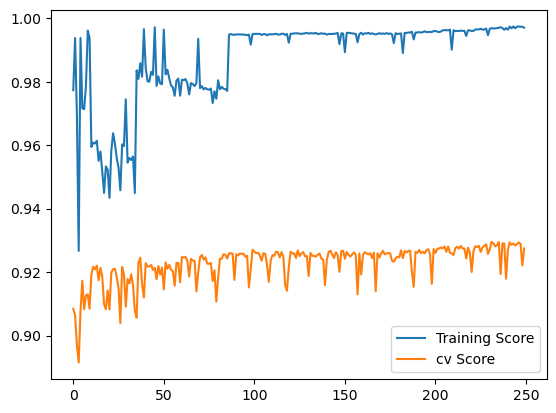

In [61]:
plt.plot(df["number"],df["user_attrs_training score"],label = "Training Score")
plt.plot(df["number"],df["value"],label = "cv Score")
plt.legend()
plt.show()

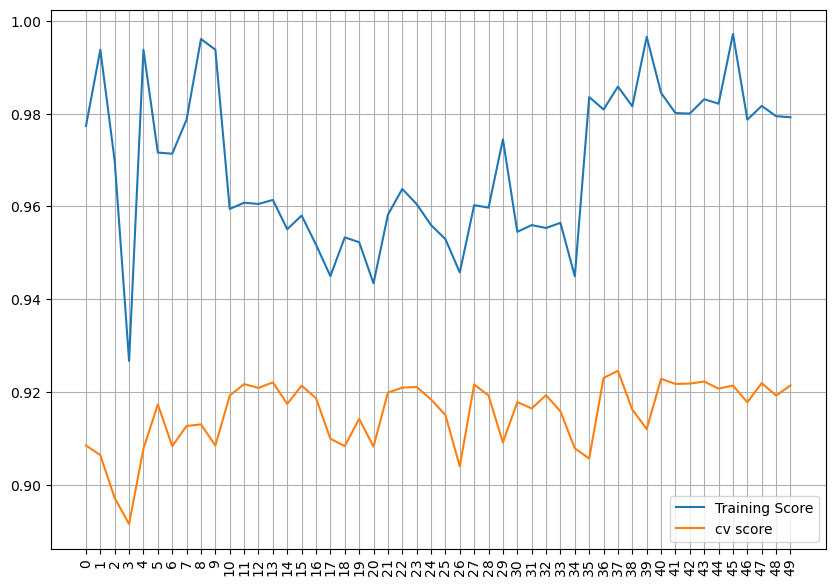

In [62]:
plt.figure(figsize=(10,7))
plt.plot(df["number"][0:50],df["user_attrs_training score"][0:50],label = "Training Score")
plt.plot(df["number"][0:50],df["value"][0:50],label = "cv score")
plt.legend()
plt.grid()
plt.xticks(df["number"][0:50], rotation=90)
plt.show()

In [63]:
## Our Model which we got as best Value by Optuna

study.best_trial

FrozenTrial(number=231, state=1, values=[0.9295548342627895], datetime_start=datetime.datetime(2025, 2, 23, 16, 45, 9, 298853), datetime_complete=datetime.datetime(2025, 2, 23, 16, 45, 10, 647775), params={'neighbors1': 3, 'distance1': 1, 'weights1': 'distance', 'algo1': 'kd_tree', 'neighbors2': 65, 'distance2': 1, 'weights2': 'distance', 'algo2': 'brute', 'depth': 22, 'min_splits': 10, 'min_leaf': 8, 'max_features': None, 'min_impurity': 0.03975594794302634}, user_attrs={'training score': 0.9968787826460307}, system_attrs={}, intermediate_values={}, distributions={'neighbors1': IntDistribution(high=20, log=False, low=3, step=1), 'distance1': CategoricalDistribution(choices=(1, 2)), 'weights1': CategoricalDistribution(choices=('uniform', 'distance')), 'algo1': CategoricalDistribution(choices=('ball_tree', 'kd_tree', 'brute')), 'neighbors2': IntDistribution(high=95, log=False, low=15, step=1), 'distance2': CategoricalDistribution(choices=(1, 2)), 'weights2': CategoricalDistribution(choi

In [64]:
## Best Fit Model

df.iloc[15]

number                                               15
value                                          0.921368
datetime_start               2025-02-23 16:40:36.367131
datetime_complete            2025-02-23 16:40:37.758480
duration                         0 days 00:00:01.391349
params_algo1                                    kd_tree
params_algo2                                  ball_tree
params_depth                                         14
params_distance1                                      1
params_distance2                                      1
params_max_features                                sqrt
params_min_impurity                            0.111703
params_min_leaf                                       4
params_min_splits                                    13
params_neighbors1                                     5
params_neighbors2                                    30
params_weights1                                 uniform
params_weights2                                 

## Generalized Score Using Voting Ensemble with Best-Fit Models

In [65]:
model1 = KNeighborsRegressor(n_neighbors=5,p=1, algorithm="kd_tree", weights="uniform")
model2 = DecisionTreeRegressor()
model3 = KNeighborsRegressor(n_neighbors=30,p=1, algorithm="ball_tree", weights="uniform")
model4 = DecisionTreeRegressor(max_depth=14, min_samples_split=13, min_samples_leaf=4, min_impurity_decrease=0.111703)

ve = VotingRegressor(estimators= [("knn1",model1), ("DT1",model2), ("knn2",model3), ("DT2",model4)], n_jobs=-1)

In [66]:
ve.fit(x_train,y_train)
y_cap = ve.predict(x_test)
r2_score( y_test, y_cap)

0.9289956305987486

---

**Generalized Score using Voting Ensemble = 0.9289**

---

## B. Bagging Ensemble

+ We use Algorithm which must be OverFit for better result using Bagging Ensemble 

In [13]:
from sklearn.ensemble import BaggingRegressor

In [14]:
def objective(trial):
    
    base_model = trial.suggest_categorical("base_model", ["decision_tree", "knn"])
    
    if base_model == "knn":
    
        k1 = trial.suggest_int("neighbors1",3,10)         ## High Variance Model
        p1 = trial.suggest_categorical("distance1",[1,2])
        weights1 = trial.suggest_categorical("weights1",["uniform","distance"])
        algo1 = trial.suggest_categorical("algo1",["ball_tree", "kd_tree", "brute"])

        model = KNeighborsRegressor(n_neighbors=k1, weights=weights1, p=p1, algorithm=algo1)
    
    elif base_model == "decision_tree":

        min_split = trial.suggest_int("min_samples_split", 2, 5) 
        min_leaf = trial.suggest_int("min_samples_leaf", 1, 2)
    
        model = DecisionTreeRegressor(min_samples_split=min_split, min_samples_leaf=min_leaf)     ## High variance Model
        
    n_est = trial.suggest_int("n_est",10,50)
    max_sample = trial.suggest_float("max_samples", 0.7, 0.9)
    
    be = BaggingRegressor(estimator=model, n_estimators=n_est, max_samples=max_sample)

    cv_score = cross_validate(estimator=be, X=x_train, y=y_train, cv=4,scoring="r2")["test_score"].mean()
    train_score = cross_validate(estimator=be, X=x_train, y=y_train, cv=4,scoring="r2", return_train_score=True)["train_score"].mean()
    
    trial.set_user_attr("training score",train_score)
    
    return cv_score

In [15]:
study = optuna.create_study(direction="maximize", sampler= optuna.samplers.TPESampler())

[I 2025-02-23 16:51:31,630] A new study created in memory with name: no-name-e0504bce-efb0-4725-ac04-f2c0361acefc


In [16]:
study.optimize(objective,n_trials=200, n_jobs=-1)

[I 2025-02-23 16:51:39,152] Trial 3 finished with value: 0.9465685339294008 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 2, 'min_samples_leaf': 2, 'n_est': 18, 'max_samples': 0.817622147824118}. Best is trial 3 with value: 0.9465685339294008.
[I 2025-02-23 16:51:41,683] Trial 4 finished with value: 0.9477910009253105 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 5, 'min_samples_leaf': 1, 'n_est': 25, 'max_samples': 0.7569902303463878}. Best is trial 4 with value: 0.9477910009253105.
[I 2025-02-23 16:51:42,271] Trial 0 finished with value: 0.8201141655668792 and parameters: {'base_model': 'knn', 'neighbors1': 10, 'distance1': 2, 'weights1': 'distance', 'algo1': 'kd_tree', 'n_est': 11, 'max_samples': 0.8258705914759972}. Best is trial 4 with value: 0.9477910009253105.
[I 2025-02-23 16:51:43,238] Trial 7 finished with value: 0.9471580131910564 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 4, 'min_samples_leaf': 2, 'n_es

[I 2025-02-23 16:52:56,891] Trial 31 finished with value: 0.9504792684376319 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 4, 'min_samples_leaf': 1, 'n_est': 46, 'max_samples': 0.8737895269600457}. Best is trial 21 with value: 0.9507147772219512.
[I 2025-02-23 16:52:57,202] Trial 30 finished with value: 0.9511889417578542 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 4, 'min_samples_leaf': 1, 'n_est': 50, 'max_samples': 0.869172142165121}. Best is trial 30 with value: 0.9511889417578542.
[I 2025-02-23 16:52:59,949] Trial 33 finished with value: 0.9489539782839516 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 5, 'min_samples_leaf': 1, 'n_est': 43, 'max_samples': 0.8681666637441341}. Best is trial 30 with value: 0.9511889417578542.
[I 2025-02-23 16:53:00,234] Trial 32 finished with value: 0.9492688355855468 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 4, 'min_samples_leaf': 1, 'n_est': 43, 'max_s

[I 2025-02-23 16:54:37,770] Trial 57 finished with value: 0.815247348784527 and parameters: {'base_model': 'knn', 'neighbors1': 8, 'distance1': 2, 'weights1': 'uniform', 'algo1': 'brute', 'n_est': 47, 'max_samples': 0.8466121040013674}. Best is trial 30 with value: 0.9511889417578542.
[I 2025-02-23 16:54:42,127] Trial 60 finished with value: 0.9507241981900583 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 4, 'min_samples_leaf': 1, 'n_est': 45, 'max_samples': 0.8873687448025614}. Best is trial 30 with value: 0.9511889417578542.
[I 2025-02-23 16:54:52,194] Trial 62 finished with value: 0.9499712047031378 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 4, 'min_samples_leaf': 1, 'n_est': 45, 'max_samples': 0.884889993194045}. Best is trial 30 with value: 0.9511889417578542.
[I 2025-02-23 16:54:55,151] Trial 64 finished with value: 0.9504983149594646 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 4, 'min_samples_leaf': 1, 'n_

[I 2025-02-23 16:56:02,612] Trial 90 finished with value: 0.9513169772739068 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 2, 'min_samples_leaf': 2, 'n_est': 48, 'max_samples': 0.8773310778825951}. Best is trial 72 with value: 0.9527556966765767.
[I 2025-02-23 16:56:03,794] Trial 95 finished with value: 0.9458285152862311 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 2, 'min_samples_leaf': 2, 'n_est': 21, 'max_samples': 0.7223212850919615}. Best is trial 72 with value: 0.9527556966765767.
[I 2025-02-23 16:56:04,613] Trial 92 finished with value: 0.9505693338264534 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 2, 'min_samples_leaf': 2, 'n_est': 48, 'max_samples': 0.877513091618099}. Best is trial 72 with value: 0.9527556966765767.
[I 2025-02-23 16:56:09,414] Trial 93 finished with value: 0.9504856610396007 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 2, 'min_samples_leaf': 2, 'n_est': 48, 'max_s

[I 2025-02-23 16:57:19,083] Trial 122 finished with value: 0.9492453331296004 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 3, 'min_samples_leaf': 2, 'n_est': 44, 'max_samples': 0.862731884029496}. Best is trial 72 with value: 0.9527556966765767.
[I 2025-02-23 16:57:19,753] Trial 123 finished with value: 0.9498978776403193 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 3, 'min_samples_leaf': 2, 'n_est': 44, 'max_samples': 0.8622298390564501}. Best is trial 72 with value: 0.9527556966765767.
[I 2025-02-23 16:57:22,414] Trial 125 finished with value: 0.9509154181399866 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 3, 'min_samples_leaf': 2, 'n_est': 47, 'max_samples': 0.8895029370024414}. Best is trial 72 with value: 0.9527556966765767.
[I 2025-02-23 16:57:23,169] Trial 124 finished with value: 0.9507018587874034 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 3, 'min_samples_leaf': 2, 'n_est': 48, 'm

[I 2025-02-23 16:58:37,023] Trial 152 finished with value: 0.9506367048993822 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 2, 'min_samples_leaf': 1, 'n_est': 47, 'max_samples': 0.8746180219720482}. Best is trial 72 with value: 0.9527556966765767.
[I 2025-02-23 16:58:39,299] Trial 153 finished with value: 0.9505836288478564 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 2, 'min_samples_leaf': 1, 'n_est': 49, 'max_samples': 0.887050306321169}. Best is trial 72 with value: 0.9527556966765767.
[I 2025-02-23 16:58:44,618] Trial 156 finished with value: 0.8264344152548159 and parameters: {'base_model': 'knn', 'neighbors1': 9, 'distance1': 2, 'weights1': 'distance', 'algo1': 'brute', 'n_est': 45, 'max_samples': 0.879913207942047}. Best is trial 72 with value: 0.9527556966765767.
[I 2025-02-23 16:58:45,290] Trial 154 finished with value: 0.826261123762667 and parameters: {'base_model': 'knn', 'neighbors1': 9, 'distance1': 2, 'weights1': 'distance',

[I 2025-02-23 16:59:58,525] Trial 184 finished with value: 0.9510079574224681 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 3, 'min_samples_leaf': 1, 'n_est': 50, 'max_samples': 0.8800914675910738}. Best is trial 72 with value: 0.9527556966765767.
[I 2025-02-23 17:00:07,853] Trial 185 finished with value: 0.951270721571622 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 2, 'min_samples_leaf': 1, 'n_est': 50, 'max_samples': 0.8942537336892611}. Best is trial 72 with value: 0.9527556966765767.
[I 2025-02-23 17:00:09,173] Trial 186 finished with value: 0.9521714333402578 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 2, 'min_samples_leaf': 1, 'n_est': 50, 'max_samples': 0.8932786183215972}. Best is trial 72 with value: 0.9527556966765767.
[I 2025-02-23 17:00:09,459] Trial 187 finished with value: 0.95035225145367 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 2, 'min_samples_leaf': 1, 'n_est': 50, 'max

In [17]:
study.best_value

0.9527556966765767

In [18]:
study.best_params

{'base_model': 'decision_tree',
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'n_est': 49,
 'max_samples': 0.8976959323422012}

In [19]:
df1 = study.trials_dataframe()
df1

,number,value,datetime_start,datetime_complete,duration,params_algo1,params_base_model,params_distance1,params_max_samples,params_min_samples_leaf,params_min_samples_split,params_n_est,params_neighbors1,params_weights1,user_attrs_training score,state
0,0,0.820114,2025-02-23 16:51:32.880382,2025-02-23 16:51:42.270343,0 days 00:00:09.389961,kd_tree,knn,2.0,0.825871,NaN,NaN,11,10.0,distance,0.961982,COMPLETE
1,1,0.949682,2025-02-23 16:51:32.881392,2025-02-23 16:51:44.421047,0 days 00:00:11.539655,NaN,decision_tree,NaN,0.764802,1.0,5.0,37,NaN,NaN,0.986307,COMPLETE
2,2,0.824633,2025-02-23 16:51:32.882432,2025-02-23 16:51:50.641049,0 days 00:00:17.758617,brute,knn,2.0,0.869469,NaN,NaN,30,6.0,uniform,0.874306,COMPLETE
3,3,0.946569,2025-02-23 16:51:32.887389,2025-02-23 16:51:39.151410,0 days 00:00:06.264021,NaN,decision_tree,NaN,0.817622,2.0,2.0,18,NaN,NaN,0.985124,COMPLETE
4,4,0.947791,2025-02-23 16:51:32.901875,2025-02-23 16:51:41.683633,0 days 00:00:08.781758,NaN,decision_tree,NaN,0.756990,1.0,5.0,25,NaN,NaN,0.985675,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,0.951112,2025-02-23 17:00:09.463143,2025-02-23 17:00:33.351029,0 days 00:00:23.887886,NaN,decision_tree,NaN,0.826310,1.0,2.0,48,NaN,NaN,0.990131,COMPLETE
196,196,0.950668,2025-02-23 17:00:12.429127,2025-02-23 17:00:36.722203,0 days 00:00:24.293076,NaN,decision_tree,NaN,0.885360,1.0,2.0,48,NaN,NaN,0.991279,COMPLETE
197,197,0.951071,2025-02-23 17:00:16.956770,2025-02-23 17:00:39.713865,0 days 00:00:22.757095,NaN,decision_tree,NaN,0.885152,1.0,2.0,48,NaN,NaN,0.991336,COMPLETE
198,198,0.951291,2025-02-23 17:00:19.363023,2025-02-23 17:00:40.518578,0 days 00:00:21.155555,NaN,decision_tree,NaN,0.891413,1.0,2.0,48,NaN,NaN,0.991305,COMPLETE


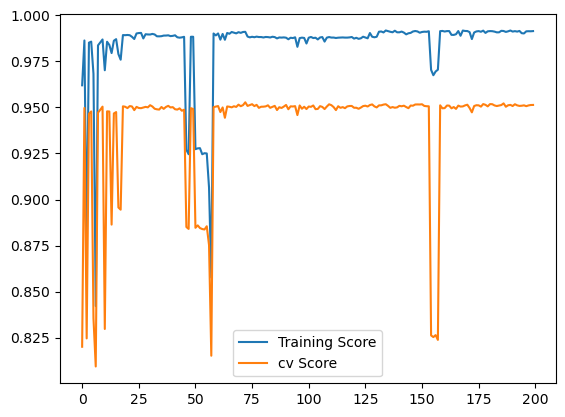

In [20]:
plt.plot(df1["number"],df1["user_attrs_training score"],label = "Training Score")
plt.plot(df1["number"],df1["value"],label = "cv Score")
plt.legend()
plt.show()

In [22]:
## Our Model which we got as best Value by Optuna

study.best_trial

FrozenTrial(number=182, state=1, values=[0.9995713497737971], datetime_start=datetime.datetime(2025, 2, 19, 12, 36, 41, 897903), datetime_complete=datetime.datetime(2025, 2, 19, 12, 36, 54, 281937), params={'base_model': 'decision_tree', 'min_samples_split': 4, 'min_samples_leaf': 2, 'n_est': 35, 'max_samples': 0.8710008873905649}, user_attrs={'training score': 0.9998356636279268}, system_attrs={}, intermediate_values={}, distributions={'base_model': CategoricalDistribution(choices=('decision_tree', 'knn')), 'min_samples_split': IntDistribution(high=5, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=2, log=False, low=1, step=1), 'n_est': IntDistribution(high=50, log=False, low=10, step=1), 'max_samples': FloatDistribution(high=0.9, log=False, low=0.7, step=None)}, trial_id=182, value=None)

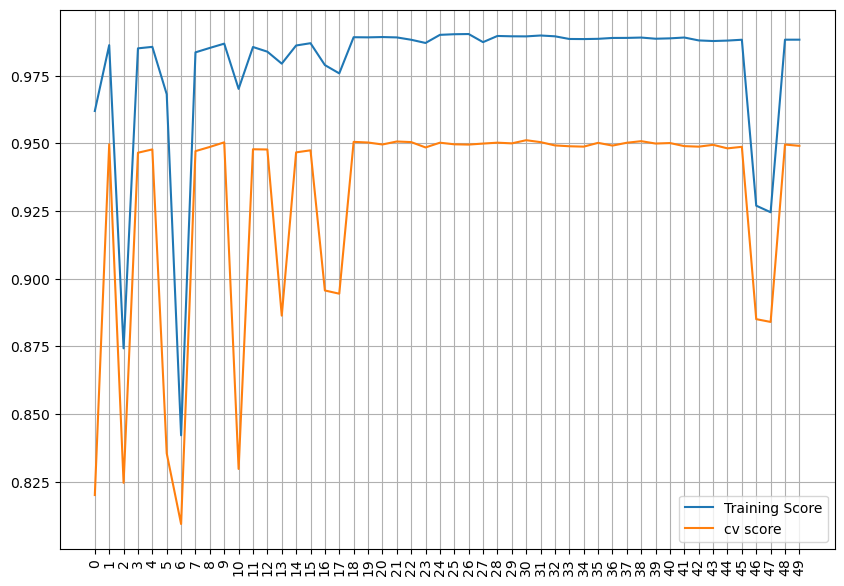

In [21]:
plt.figure(figsize=(10,7))
plt.plot(df1["number"][0:50],df1["user_attrs_training score"][0:50],label = "Training Score")
plt.plot(df1["number"][0:50],df1["value"][0:50],label = "cv score")
plt.legend()
plt.grid()
plt.xticks(df1["number"][0:50], rotation=90)
plt.show()

In [22]:
df1.iloc[9]

number                                                9
value                                          0.950407
datetime_start               2025-02-23 16:51:41.691687
datetime_complete            2025-02-23 16:51:57.237969
duration                         0 days 00:00:15.546282
params_algo1                                        NaN
params_base_model                         decision_tree
params_distance1                                    NaN
params_max_samples                             0.838404
params_min_samples_leaf                             2.0
params_min_samples_split                            3.0
params_n_est                                         40
params_neighbors1                                   NaN
params_weights1                                     NaN
user_attrs_training score                      0.986861
state                                          COMPLETE
Name: 9, dtype: object

## Generalized Score Using Bagging Ensemble with Best-Fit Model

In [23]:
model = DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=3)
br = BaggingRegressor(estimator=model, n_estimators=40, max_samples=0.838404)

In [24]:
br.fit(x_train, y_train)
y_cap1 = br.predict(x_test)
r2_score(y_test, y_cap1)

0.9545861113154692

---

**Generalized Score using Bagging Ensemble = 0.9545**

---

## C. Random Forest

+ We use Algorithm which must be OverFit for better result using RandomForest 

In [13]:
def objective(trial):

    min_split = trial.suggest_int("min_samples_split", 2, 5)    ## High Variance Model
    min_leaf = trial.suggest_int("min_samples_leaf", 1, 2)
    max_feature = trial.suggest_categorical("max_feature",["log2","sqrt"])   ## Should not use "None"
        
    n_est = trial.suggest_int("n_est",10,50)
    max_sample = trial.suggest_float("max_samples", 0.7, 0.9)
    
    be = RandomForestRegressor(n_estimators=n_est, max_samples=max_sample, min_samples_split=min_split,
                               min_samples_leaf=min_leaf, max_features=max_feature)

    cv_score = cross_validate(estimator=be, X=x_train, y=y_train, cv=4,scoring="r2")["test_score"].mean()
    train_score = cross_validate(estimator=be, X=x_train, y=y_train, cv=4,scoring="r2", return_train_score=True)["train_score"].mean()
    
    trial.set_user_attr("training score",train_score)
    
    return cv_score

In [14]:
study = optuna.create_study(direction="maximize", sampler= optuna.samplers.TPESampler())

[I 2025-02-23 17:07:33,246] A new study created in memory with name: no-name-5bf4741c-892a-4772-a1a3-c6e3b8bd07d7


In [15]:
study.optimize(objective,n_trials=120, n_jobs=-1)

[I 2025-02-23 17:08:02,803] Trial 0 finished with value: 0.9327698863931012 and parameters: {'min_samples_split': 4, 'min_samples_leaf': 2, 'max_feature': 'log2', 'n_est': 11, 'max_samples': 0.7421510740091912}. Best is trial 0 with value: 0.9327698863931012.
[I 2025-02-23 17:08:03,457] Trial 1 finished with value: 0.9361532449213948 and parameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_feature': 'log2', 'n_est': 14, 'max_samples': 0.8377129386267681}. Best is trial 1 with value: 0.9361532449213948.
[I 2025-02-23 17:08:03,607] Trial 7 finished with value: 0.9361388897100048 and parameters: {'min_samples_split': 3, 'min_samples_leaf': 1, 'max_feature': 'sqrt', 'n_est': 13, 'max_samples': 0.7800635799514497}. Best is trial 1 with value: 0.9361532449213948.
[I 2025-02-23 17:08:04,297] Trial 5 finished with value: 0.9395109390277694 and parameters: {'min_samples_split': 4, 'min_samples_leaf': 1, 'max_feature': 'log2', 'n_est': 18, 'max_samples': 0.7764112876611199}. Best is 

[I 2025-02-23 17:08:34,338] Trial 32 finished with value: 0.9444065883388292 and parameters: {'min_samples_split': 3, 'min_samples_leaf': 1, 'max_feature': 'sqrt', 'n_est': 32, 'max_samples': 0.8706956089825628}. Best is trial 16 with value: 0.9470533645836973.
[I 2025-02-23 17:08:35,935] Trial 33 finished with value: 0.9457952460213602 and parameters: {'min_samples_split': 3, 'min_samples_leaf': 1, 'max_feature': 'sqrt', 'n_est': 33, 'max_samples': 0.8951041383404611}. Best is trial 16 with value: 0.9470533645836973.
[I 2025-02-23 17:08:36,004] Trial 34 finished with value: 0.9446769429844042 and parameters: {'min_samples_split': 3, 'min_samples_leaf': 1, 'max_feature': 'sqrt', 'n_est': 33, 'max_samples': 0.8994782273109891}. Best is trial 16 with value: 0.9470533645836973.
[I 2025-02-23 17:08:37,298] Trial 35 finished with value: 0.9450905771833926 and parameters: {'min_samples_split': 3, 'min_samples_leaf': 1, 'max_feature': 'sqrt', 'n_est': 33, 'max_samples': 0.8988870971583176}. B

[I 2025-02-23 17:09:04,069] Trial 64 finished with value: 0.9456466208988722 and parameters: {'min_samples_split': 3, 'min_samples_leaf': 1, 'max_feature': 'sqrt', 'n_est': 46, 'max_samples': 0.801385729690514}. Best is trial 16 with value: 0.9470533645836973.
[I 2025-02-23 17:09:04,480] Trial 65 finished with value: 0.9450529668587053 and parameters: {'min_samples_split': 3, 'min_samples_leaf': 1, 'max_feature': 'sqrt', 'n_est': 38, 'max_samples': 0.8556450044905839}. Best is trial 16 with value: 0.9470533645836973.
[I 2025-02-23 17:09:04,618] Trial 67 finished with value: 0.9407364614954472 and parameters: {'min_samples_split': 4, 'min_samples_leaf': 1, 'max_feature': 'sqrt', 'n_est': 37, 'max_samples': 0.8554499913341805}. Best is trial 16 with value: 0.9470533645836973.
[I 2025-02-23 17:09:05,269] Trial 69 finished with value: 0.944355773984929 and parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_feature': 'sqrt', 'n_est': 30, 'max_samples': 0.8917719978545924}. Bes

[I 2025-02-23 17:09:38,287] Trial 93 finished with value: 0.948441788969494 and parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_feature': 'sqrt', 'n_est': 46, 'max_samples': 0.8986954861703748}. Best is trial 93 with value: 0.948441788969494.
[I 2025-02-23 17:09:38,842] Trial 94 finished with value: 0.9451453049396328 and parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_feature': 'sqrt', 'n_est': 46, 'max_samples': 0.8991006012643602}. Best is trial 93 with value: 0.948441788969494.
[I 2025-02-23 17:09:43,954] Trial 99 finished with value: 0.9461218419705757 and parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_feature': 'sqrt', 'n_est': 45, 'max_samples': 0.8882304898166995}. Best is trial 93 with value: 0.948441788969494.
[I 2025-02-23 17:09:43,982] Trial 98 finished with value: 0.9466114298277544 and parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_feature': 'sqrt', 'n_est': 46, 'max_samples': 0.8992315633306537}. Best 

In [16]:
study.best_value

0.948441788969494

In [17]:
df2 = study.trials_dataframe()
df2

,number,value,datetime_start,datetime_complete,duration,params_max_feature,params_max_samples,params_min_samples_leaf,params_min_samples_split,params_n_est,user_attrs_training score,state
0,0,0.932770,2025-02-23 17:08:00.288046,2025-02-23 17:08:02.803940,0 days 00:00:02.515894,log2,0.742151,2,4,11,0.975887,COMPLETE
1,1,0.936153,2025-02-23 17:08:00.291051,2025-02-23 17:08:03.457272,0 days 00:00:03.166221,log2,0.837713,1,5,14,0.982016,COMPLETE
2,2,0.943224,2025-02-23 17:08:00.295571,2025-02-23 17:08:10.560910,0 days 00:00:10.265339,sqrt,0.713674,1,3,50,0.985163,COMPLETE
3,3,0.942793,2025-02-23 17:08:00.297805,2025-02-23 17:08:05.687747,0 days 00:00:05.389942,log2,0.782896,1,2,22,0.986004,COMPLETE
4,4,0.943962,2025-02-23 17:08:00.308426,2025-02-23 17:08:08.213309,0 days 00:00:07.904883,log2,0.775932,1,5,38,0.982760,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,0.944086,2025-02-23 17:09:55.199717,2025-02-23 17:10:05.585234,0 days 00:00:10.385517,sqrt,0.871626,1,2,49,0.990251,COMPLETE
116,116,0.946158,2025-02-23 17:09:55.814271,2025-02-23 17:10:05.042030,0 days 00:00:09.227759,sqrt,0.871757,1,2,42,0.990104,COMPLETE
117,117,0.945991,2025-02-23 17:09:56.288407,2025-02-23 17:10:06.176914,0 days 00:00:09.888507,sqrt,0.882773,1,2,49,0.990090,COMPLETE
118,118,0.946992,2025-02-23 17:09:57.657824,2025-02-23 17:10:06.534378,0 days 00:00:08.876554,sqrt,0.883402,1,2,45,0.989870,COMPLETE


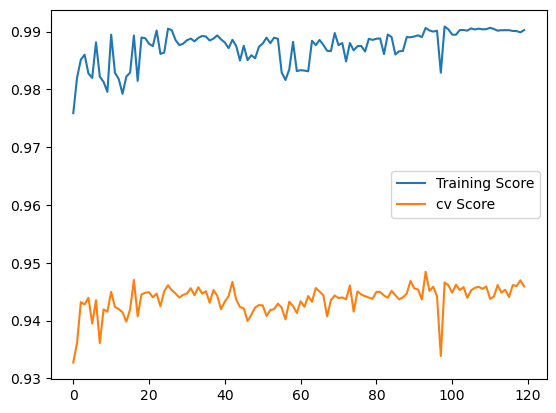

In [18]:
plt.plot(df2["number"],df2["user_attrs_training score"],label = "Training Score")
plt.plot(df2["number"],df2["value"],label = "cv Score")
plt.legend()
plt.show()

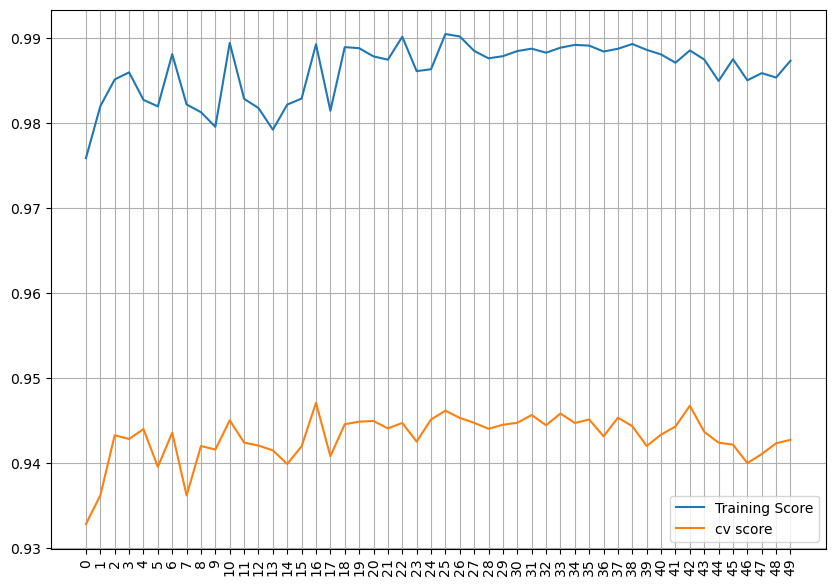

In [19]:
plt.figure(figsize=(10,7))
plt.plot(df2["number"][0:50],df2["user_attrs_training score"][0:50],label = "Training Score")
plt.plot(df2["number"][0:50],df2["value"][0:50],label = "cv score")
plt.legend()
plt.grid()
plt.xticks(df2["number"][0:50], rotation=90)
plt.show()

In [20]:
study.best_trial

FrozenTrial(number=93, state=1, values=[0.948441788969494], datetime_start=datetime.datetime(2025, 2, 23, 17, 9, 26, 489853), datetime_complete=datetime.datetime(2025, 2, 23, 17, 9, 38, 287370), params={'min_samples_split': 2, 'min_samples_leaf': 1, 'max_feature': 'sqrt', 'n_est': 46, 'max_samples': 0.8986954861703748}, user_attrs={'training score': 0.9906427761490816}, system_attrs={}, intermediate_values={}, distributions={'min_samples_split': IntDistribution(high=5, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=2, log=False, low=1, step=1), 'max_feature': CategoricalDistribution(choices=('log2', 'sqrt')), 'n_est': IntDistribution(high=50, log=False, low=10, step=1), 'max_samples': FloatDistribution(high=0.9, log=False, low=0.7, step=None)}, trial_id=93, value=None)

In [21]:
df2.iloc[13]

number                                               13
value                                          0.941444
datetime_start               2025-02-23 17:08:08.234488
datetime_complete            2025-02-23 17:08:17.155405
duration                         0 days 00:00:08.920917
params_max_feature                                 log2
params_max_samples                             0.721546
params_min_samples_leaf                               2
params_min_samples_split                              4
params_n_est                                         47
user_attrs_training score                      0.979244
state                                          COMPLETE
Name: 13, dtype: object

## Generalized Score Using Random Forest with Best-Fit Model

In [22]:
rf = RandomForestRegressor(n_estimators=47, max_samples=0.721546, max_features="log2", min_samples_leaf=2, min_samples_split=4)
rf.fit(x_train,y_train)

RandomForestRegressor(max_features='log2', max_samples=0.721546,
                      min_samples_leaf=2, min_samples_split=4, n_estimators=47)

In [23]:
y_cappp = rf.predict(x_test)
r2_score(y_test, y_cappp)

0.9471866842707919

---

**Generalized Score using Random Forest = 0.947**

---

## Dump the Best-Model -> Bagging Ensemble 

In [40]:
model = DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=3)
br = BaggingRegressor(estimator=model, n_estimators=40, max_samples=0.838404)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler

In [42]:
cont_pl = Pipeline(steps = [("Continuse", RobustScaler())])
cat_pl = Pipeline(steps = [("Categorical", OneHotEncoder(drop="first", sparse_output=False))])

In [46]:
preprocessor = ColumnTransformer(transformers=[("cont",cont_pl,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]),
                                               ("categ", cat_pl, [1])], remainder="passthrough")

In [47]:
final_pl = Pipeline(steps = [("transformer",preprocessor),
                            ("Model",br)])

In [48]:
final_pl.fit(x_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cont',
                                                  Pipeline(steps=[('Continuse',
                                                                   RobustScaler())]),
                                                  [0, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19]),
                                                 ('categ',
                                                  Pipeline(steps=[('Categorical',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  [1])])),
                ('Model',
                 BaggingRegressor(estimator=DecisionTreeRegressor(min_samples_leaf=2,
                                                                  min_samples_split=3),
                                  max_samples=0.838404, n_estimators=40))])

In [49]:
final_pl.predict(x_test)

array([58.00354167, 49.49275   , 47.747875  , 48.81616667, 73.10704167,
       76.05852976, 55.25983333, 73.37795833, 73.278125  , 80.42108333,
       76.87989583, 74.85277083, 73.24175595, 75.04461905, 74.48279167,
       73.8356875 , 63.31933333, 73.42514881, 59.66770833, 73.9978869 ,
       54.940875  , 58.121     , 54.62925   , 71.95866667, 82.11770833,
       74.20130357, 82.20633929, 76.75781548, 78.11272024, 71.9950119 ,
       67.92659524, 46.05060119, 80.97450595, 54.748375  , 66.28189881,
       68.27758333, 71.02429167, 47.22991667, 80.76008929, 75.2464881 ,
       72.08004167, 72.72391667, 84.58536012, 72.36481108, 73.51195238,
       72.48975481, 54.61936905, 61.13302976, 73.53610331, 63.60375   ,
       63.75257143, 79.47733333, 55.46508333, 73.31675   , 73.779625  ,
       74.12572917, 74.93260714, 54.35654762, 58.43785119, 69.25671825,
       76.6615    , 73.36281646, 62.52444048, 68.89020833, 55.71495833,
       71.23458333, 73.71612329, 49.323875  , 72.99395833, 66.10

In [51]:
r2_score(y_test, final_pl.predict(x_test))

0.9528592648008675

In [52]:
import pickle

with open("life_expectancy_model.pkl", "wb") as file:
    pickle.dump(final_pl, file)

In [ ]:
# scikit-learn                  1.6.1
# numpy                         1.24.3
# pandas                        2.0.3
# seaborn                       0.13.0
# matplotlib                    3.7.2